# Part 1: Data Preprocessing

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
dataset = pd.read_csv('employee.csv')

In [65]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [66]:
dataset.shape

(1470, 35)

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [68]:
dataset.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [69]:
len(dataset.select_dtypes(include=['object']).columns)

9

In [70]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [71]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

26

In [72]:
# Statical summary
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [73]:
dataset.isnull().sum().sum()

0

## Resturcting the dataset

In [74]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [75]:
# drop below columns(makes no sencs )
# EmployeeCount, EmployeeNumber, Over18, StandardHours
# As this three contain only one value
dataset.EmployeeCount.unique(),dataset.Over18.unique(),dataset.StandardHours.unique(),

(array([1], dtype=int64), array(['Y'], dtype=object), array([80], dtype=int64))

In [76]:
dataset.drop(columns=['StandardHours','Over18', 'EmployeeNumber','EmployeeCount'], inplace=True)

In [77]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Dealing with the missing values

In [78]:
dataset.isnull().sum().sum()


0

## CountPlot

<AxesSubplot:xlabel='Attrition', ylabel='count'>

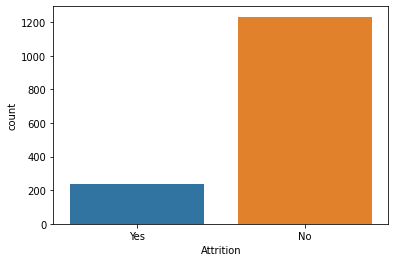

In [79]:
sns.countplot(data=dataset, x='Attrition')

In [80]:
dataset.Attrition.value_counts()
# Yes == Employee left the company


No     1233
Yes     237
Name: Attrition, dtype: int64

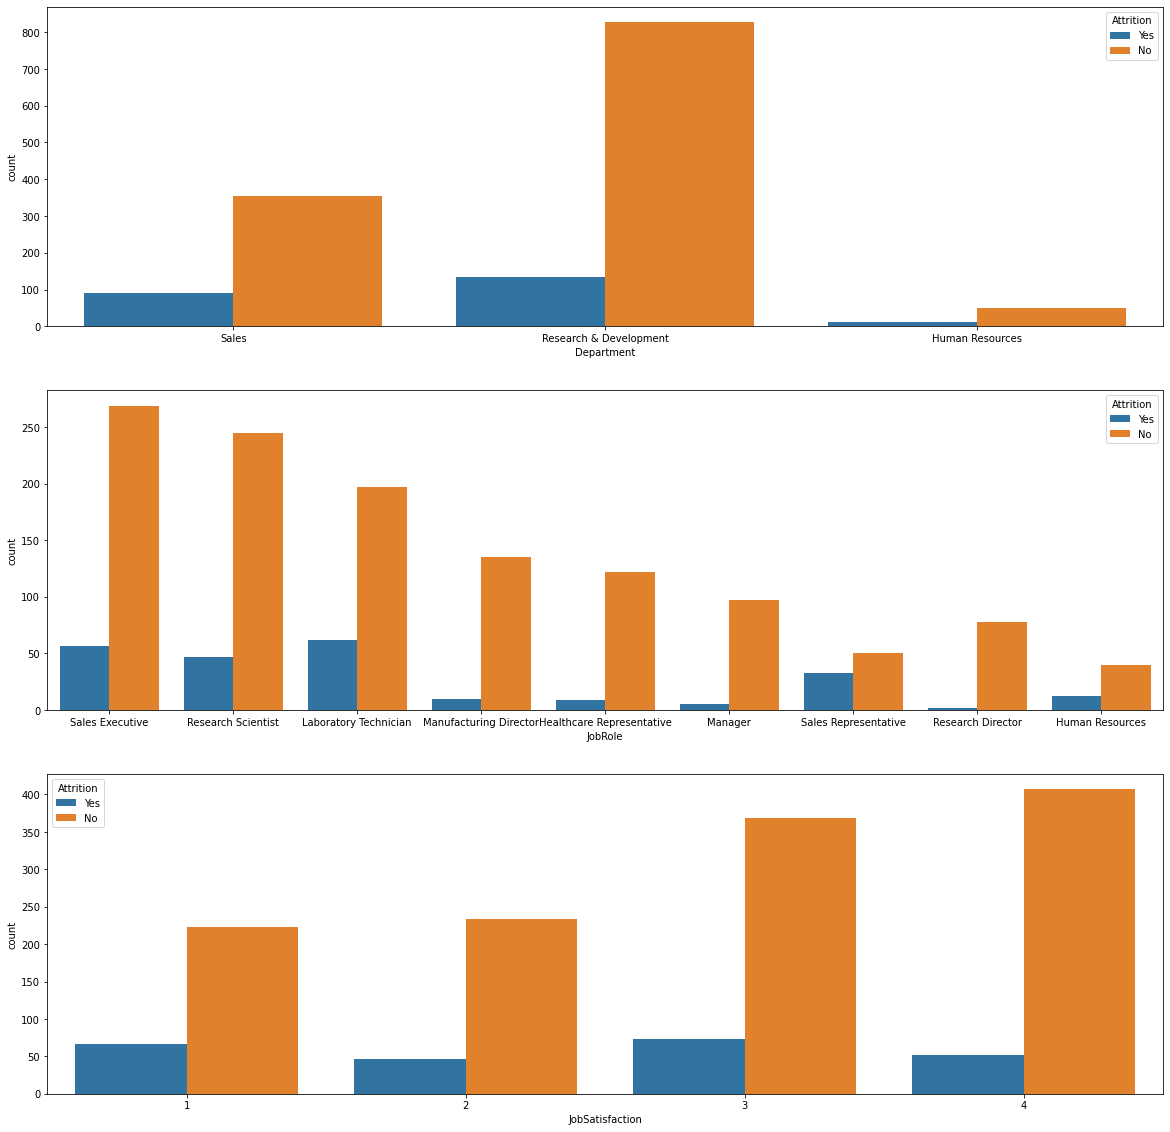

In [81]:
plt.figure(figsize=(20, 20))
plt.subplot(311)
sns.countplot(data=dataset, x='Department', hue='Attrition')
plt.subplot(312)
sns.countplot(data=dataset, x='JobRole', hue='Attrition')
plt.subplot(313)
sns.countplot(data=dataset, x='JobSatisfaction', hue='Attrition')
plt.show()

## Correlation matrix

In [82]:
corr = dataset.corr()

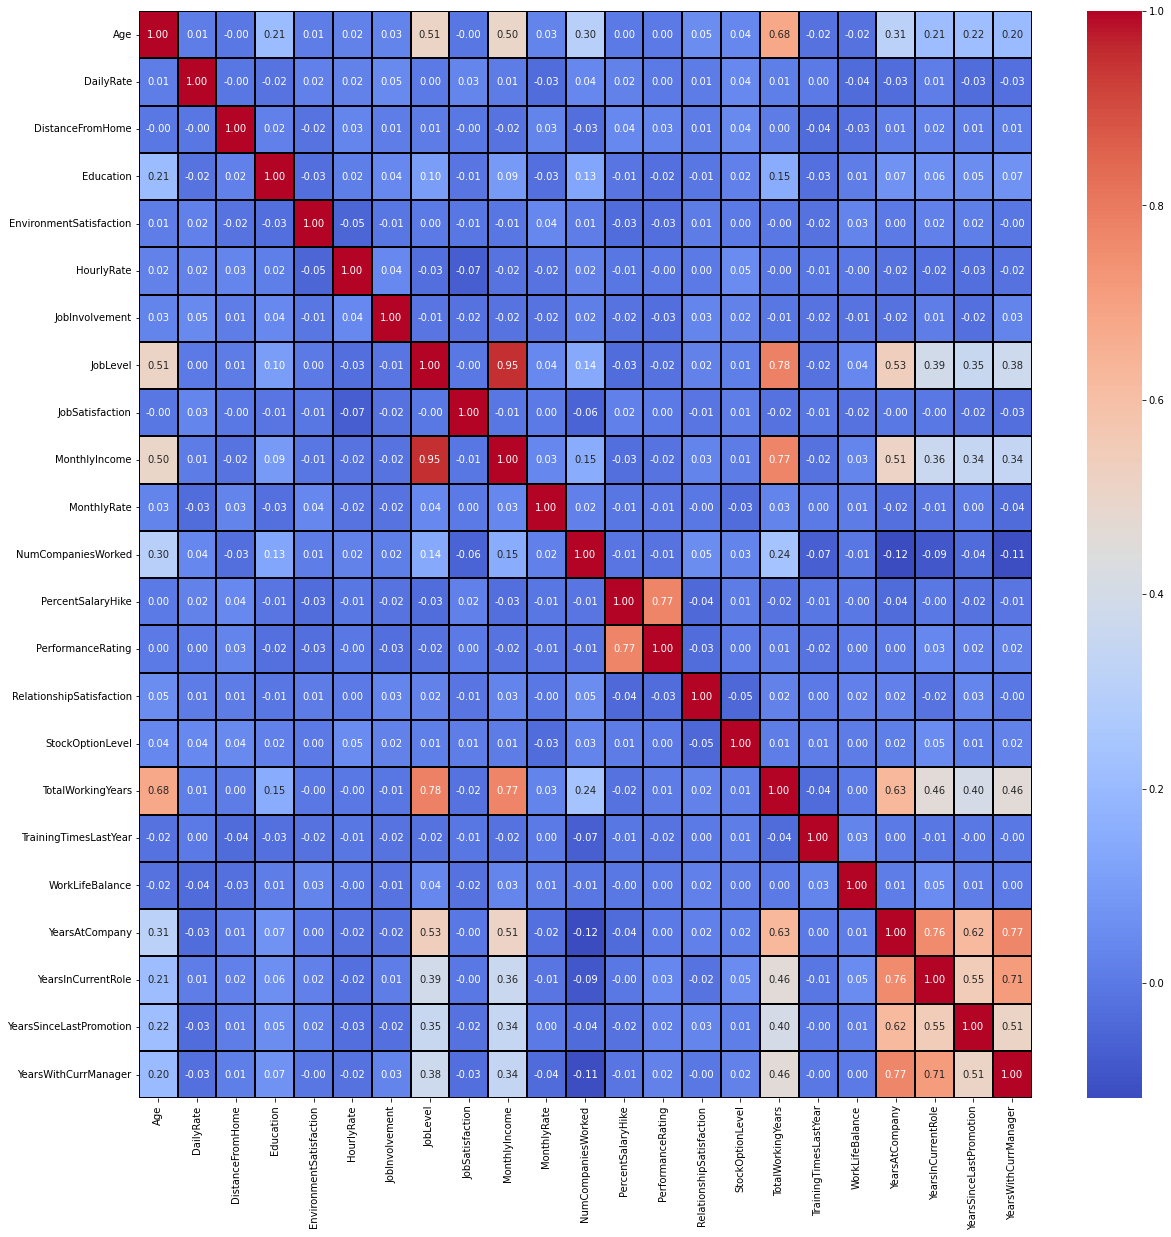

In [83]:
# correlation matrix
plt.figure(figsize=(20, 20))
ax =sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=2, linecolor='black')


    

# Dealing with the categorical data

In [84]:
dataset.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

## One hot encoding

In [85]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [86]:
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [87]:
len(dataset.select_dtypes(include=['object']).columns)

0

In [88]:
dataset.rename(columns={"Attrition_Yes": "Attrition"}, inplace=True)

In [89]:
dataset.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: uint8

## Splitting the dataset

In [90]:
# matrix of features
x = dataset.drop(columns=['Attrition'])
# Target variable
y = dataset['Attrition']

In [93]:
# import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [94]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1176, 44), (294, 44), (1176,), (294,))

In [96]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [102]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [103]:
lr.score(x_test, y_test)

0.8843537414965986

In [107]:
# import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = lr.predict(x_test)

In [108]:
accuracy_score(y_test, y_pred)

0.8843537414965986

In [109]:
confusion_matrix(y_test, y_pred)

array([[237,   8],
       [ 26,  23]], dtype=int64)

In [111]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [113]:
rf.score(x_test, y_test)

0.8503401360544217

In [114]:
y_pred = rf.predict(x_test)

In [115]:
accuracy_score(y_test, y_pred)

0.8503401360544217

In [116]:
confusion_matrix(y_test, y_pred)

array([[243,   2],
       [ 42,   7]], dtype=int64)

In [119]:
# import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [120]:
xgb.score(x_test, y_test)

0.8537414965986394

In [121]:
y_pred = xgb.predict(x_test)

In [122]:
confusion_matrix(y_test, y_pred)


array([[237,   8],
       [ 35,  14]], dtype=int64)

## Support Vector Machine

In [123]:
# import svc
from sklearn.svm import SVC

In [124]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [125]:
svc.score(x_test, y_test)

0.8673469387755102

In [127]:
y_pred = svc.predict(x_test)

In [128]:
confusion_matrix(y_test, y_pred)

array([[243,   2],
       [ 37,  12]], dtype=int64)

# Part 3: Randomized Search to find the best parametes(Logistic Regression)

In [129]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [169]:
parameters = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.0125,0.025 ,0.05, 0.5,0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
    'solver': ['saga'],
    'max_iter': [100, 150, 175, 200, 125,250, 300, 400, 500]
    
}

In [170]:
random_cv = RandomizedSearchCV(estimator=lr, param_distributions=parameters, cv=5, n_iter=50, scoring='roc_auc', n_jobs=-1, verbose=3)

In [171]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.0125, 0.025, 0.05, 0.5, 0.1,
                                              0.2, 0.5, 1.0, 2.0, 5.0],
                                        'max_iter': [100, 150, 175, 200, 125,
                                                     250, 300, 400, 500],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['saga']},
                   scoring='roc_auc', verbose=3)

In [172]:
random_cv.best_estimator_

LogisticRegression(C=0.05, max_iter=250, solver='saga')

In [173]:
random_cv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 250, 'C': 0.05}

In [174]:
random_cv.best_score_

0.8273783498603162

## Part 4: Final model(Logistic Regression)

In [175]:
classifier = LogisticRegression(C=0.05, solver='saga')

In [176]:
classifier.fit(x_train, y_train)

LogisticRegression(C=0.05, solver='saga')

In [177]:
classifier.score(x_test, y_test)

0.891156462585034

In [178]:
y_pred = classifier.predict(x_test)

In [179]:
confusion_matrix(y_test, y_pred)

array([[242,   3],
       [ 29,  20]], dtype=int64)

# Part 5: Predicting a single observation

In [180]:
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [182]:
single_obs = [[41, 1102, 1, 2, 2, 94, 3, 2, 4, 5993, 19479, 8, 11, 3, 1, 0, 8, 8, 1, 6, 4, 8, 5, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]]

In [183]:
classifier.predict(sc.transform(single_obs))

c:\Users\baral\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [ ]:
# Final Result 
# Employee will leave the company